<a href="https://colab.research.google.com/github/maskot1977/Python2020/blob/1202/79.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!date

Wed Dec  2 13:37:29 UTC 2020


In [11]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

fx_observed = f(x_observed) # f(x) の観測値
gx_observed = g(x_observed) # g(x) の観測値
hx_observed = h(x_observed) # h(x) の観測値

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

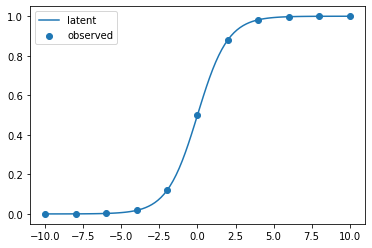

In [13]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.legend()
plt.show()

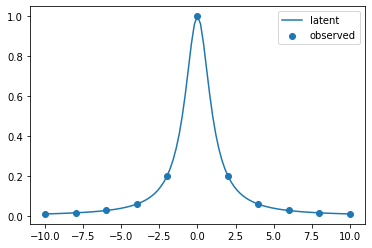

In [14]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.legend()
plt.show()

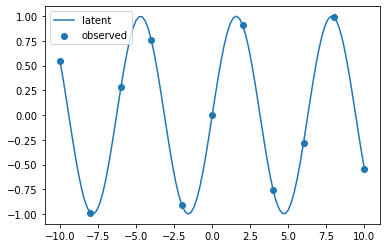

In [15]:
x_latent = np.linspace(-10, 10, 101)
plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.legend()
plt.show()

In [16]:
def spline(x_latent, x_observed, y_observed):

    n = len(x_observed) - 1
    A = np.zeros((4 * n, 4 * n))
    b = np.zeros(4 * n)

    for i in range (n - 1):
        A[4 * i][4 * i + 0] = x_observed[i]**3
        A[4 * i][4 * i + 1] = x_observed[i]**2
        A[4 * i][4 * i + 2] = x_observed[i]
        A[4 * i][4 * i + 3] = 1
        b[4 * i] = y_observed[i]

        A[4 * i + 1][4 * i + 0] = x_observed[i + 1]**3
        A[4 * i + 1][4 * i + 1] = x_observed[i + 1]**2
        A[4 * i + 1][4 * i + 2] = x_observed[i + 1]
        A[4 * i + 1][4 * i + 3] = 1
        b[4 * i + 1] = y_observed[i + 1]

        A[4 * i + 2][4 * i + 0] = 3 * x_observed[i + 1]**2
        A[4 * i + 2][4 * i + 1] = 2 * x_observed[i + 1]
        A[4 * i + 2][4 * i + 2] = 1
        A[4 * i + 2][4 * i + 4] = -3 * x_observed[i + 1]**2
        A[4 * i + 2][4 * i + 5] = -2 * x_observed[i+1]
        A[4 * i + 2][4 * i + 6] = -1

        A[4 * i + 3][4 * i + 0] = 6 * x_observed[i+1]
        A[4 * i + 3][4 * i + 1] = 2
        A[4 * i + 3][4 * i + 4] = -6 * x_observed[i+1]
        A[4 * i + 3][4 * i + 5] = -2

    A[4 * n - 4][4 * n - 4] = x_observed[n - 1]**3
    A[4 * n - 4][4 * n - 3] = x_observed[n - 1]**2
    A[4 * n - 4][4 * n - 2] = x_observed[n - 1]
    A[4 * n - 4][4 * n - 1] = 1
    b[4 * n - 4] = y_observed[n - 1]

    A[4 * n - 3][4 * n - 4] = x_observed[n]**3
    A[4 * n - 3][4 * n - 3] = x_observed[n]**2
    A[4 * n - 3][4 * n - 2] = x_observed[n]
    A[4 * n - 3][4 * n - 1] = 1
    b[4 * n - 3] = y_observed[n]

    A[4 * n - 2][0] = 6 * x_observed[0]
    A[4 * n - 2][1] = 2

    A[4 * n - 1][4 * n - 4] = 6 * x_observed[n]
    A[4 * n - 1][4 * n - 3] = 2

    coeff = np.linalg.solve(A, b)

    interporation = []
    for x in x_latent:
        for j in range (len(x_observed) - 1):
            if x_observed[j] <= x and x <= x_observed[j + 1]:
                a = coeff[4 * j]
                b = coeff[4 * j + 1]
                c = coeff[4 * j + 2]
                d = coeff[4 * j + 3]
                interporation.append(a * x**3 + b * x**2 + c * x + d)
                break
    return interporation

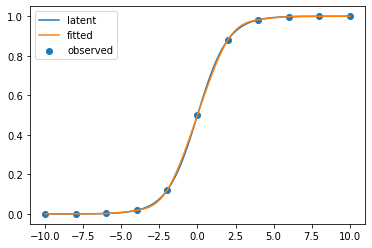

In [18]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, fx_observed, label='observed')
plt.plot(x_latent, f(x_latent), label='latent')
plt.plot(x_latent, spline(x_latent, x_observed, fx_observed), label='fitted')
plt.legend()
plt.show()

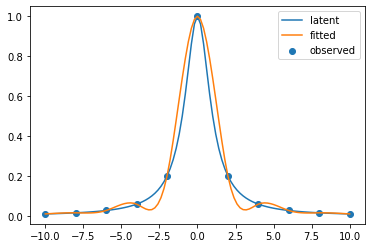

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, gx_observed, label='observed')
plt.plot(x_latent, g(x_latent), label='latent')
plt.plot(x_latent, spline(x_latent, x_observed, gx_observed), label='fitted')
plt.legend()
plt.show()

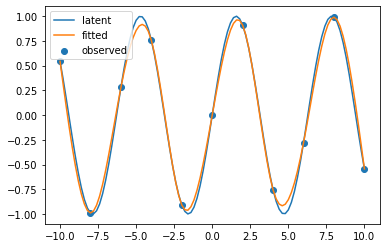

In [22]:
import matplotlib.pyplot as plt

plt.scatter(x_observed, hx_observed, label='observed')
plt.plot(x_latent, h(x_latent), label='latent')
plt.plot(x_latent, spline(x_latent, x_observed, hx_observed), label='fitted')
plt.legend()
plt.show()

In [23]:
!date

Wed Dec  2 13:41:53 UTC 2020
